# 💧 Water Potability Prediction using AI/ML — Final (Week 3)

**Project:** Water Potability Prediction using machine learning

**Author:** Harsh Chauhan

**Internship:** AICTE–Edunet–Shell Skills4Future (Green Skills & AI)

This final notebook includes all steps: preprocessing, baseline model, advanced models (Random Forest, XGBoost),
hyperparameter tuning, feature importance, final comparison, and saving the best model.


In [11]:
!pip install xgboost --quiet

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import joblib

sns.set(style='whitegrid')

In [13]:
# Load dataset (ensure uploaded to Colab or available in repo)
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Exploratory Data Analysis (brief)
- Check shape, missing values, and class balance.

In [14]:
print('Shape:', df.shape)
print('\nMissing values per column:\n', df.isnull().sum())
print('\nTarget distribution:\n', df['Potability'].value_counts())

Shape: (3276, 10)

Missing values per column:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Target distribution:
 Potability
0    1998
1    1278
Name: count, dtype: int64


## Data Preprocessing
- Impute missing values with median
- Split features and target
- Train-test split
- Standard scaling (for linear models)

In [15]:
# Impute missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Features and target
X = df_imputed.drop('Potability', axis=1)
y = df_imputed['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features for Logistic Regression (we will use tree models without scaling as well)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Done preprocessing. Shapes: ', X_train.shape, X_test.shape)

Done preprocessing. Shapes:  (2620, 9) (656, 9)


## Baseline Model — Logistic Regression
Train a simple logistic regression as a baseline.

In [16]:
baseline = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
baseline.fit(X_train_scaled, y_train)

y_pred_base = baseline.predict(X_test_scaled)
y_prob_base = baseline.predict_proba(X_test_scaled)[:,1]

print('Accuracy:', accuracy_score(y_test, y_pred_base))
print('Precision:', precision_score(y_test, y_pred_base))
print('Recall:', recall_score(y_test, y_pred_base))
print('F1-score:', f1_score(y_test, y_pred_base))
print('ROC-AUC:', roc_auc_score(y_test, y_prob_base))

print('\nClassification Report:\n', classification_report(y_test, y_pred_base))

Accuracy: 0.5259146341463414
Precision: 0.41590214067278286
Recall: 0.53125
F1-score: 0.4665523156089194
ROC-AUC: 0.5475195312500001

Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.52      0.57       400
         1.0       0.42      0.53      0.47       256

    accuracy                           0.53       656
   macro avg       0.53      0.53      0.52       656
weighted avg       0.55      0.53      0.53       656



## Random Forest — Train & Evaluate

In [17]:
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print('Random Forest - Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1-score:', f1_score(y_test, y_pred_rf))
print('ROC-AUC:', roc_auc_score(y_test, y_prob_rf))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print('\nConfusion Matrix:\n', cm)

Random Forest - Accuracy: 0.6661585365853658
Precision: 0.6761904761904762
Recall: 0.27734375
F1-score: 0.39335180055401664
ROC-AUC: 0.6617871093750001

Confusion Matrix:
 [[366  34]
 [185  71]]


## XGBoost — Train & Evaluate

In [18]:
xgb = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=4, subsample=0.9, colsample_bytree=0.9, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print('XGBoost - Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('Precision:', precision_score(y_test, y_pred_xgb))
print('Recall:', recall_score(y_test, y_pred_xgb))
print('F1-score:', f1_score(y_test, y_pred_xgb))
print('ROC-AUC:', roc_auc_score(y_test, y_prob_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:13:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Accuracy: 0.6615853658536586
Precision: 0.6148648648648649
Recall: 0.35546875
F1-score: 0.4504950495049505
ROC-AUC: 0.644052734375


## Model Comparison

In [19]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_base), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred_base), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_xgb)],
    'Recall': [recall_score(y_test, y_pred_base), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_xgb)],
    'F1': [f1_score(y_test, y_pred_base), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_xgb)],
    'ROC-AUC': [roc_auc_score(y_test, y_prob_base), roc_auc_score(y_test, y_prob_rf), roc_auc_score(y_test, y_prob_xgb)]
})
results

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.525915,0.415902,0.531250,0.466552,0.547520
1,Random Forest,0.666159,0.676190,0.277344,0.393352,0.661787
2,XGBoost,0.661585,0.614865,0.355469,0.450495,0.644053


## Hyperparameter Tuning (RandomizedSearchCV) — Random Forest & XGBoost
Using RandomizedSearch for faster tuning. This cell may take some time to run in Colab.

In [20]:
# Random Forest tuning space
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=rf_param_grid,
    n_iter=12,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)
print('Best RF params:', rf_search.best_params_)
best_rf = rf_search.best_estimator_

# Evaluate best RF
y_pred_best_rf = best_rf.predict(X_test)
y_prob_best_rf = best_rf.predict_proba(X_test)[:,1]
print('Tuned RF - F1:', f1_score(y_test, y_pred_best_rf), 'ROC-AUC:', roc_auc_score(y_test, y_prob_best_rf))

Best RF params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Tuned RF - F1: 0.4966139954853273 ROC-AUC: 0.677744140625


In [21]:
# XGBoost tuning space
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9]
}

xgb_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=xgb_param_grid,
    n_iter=12,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)
print('Best XGB params:', xgb_search.best_params_)
best_xgb = xgb_search.best_estimator_

# Evaluate best XGB
y_pred_best_xgb = best_xgb.predict(X_test)
y_prob_best_xgb = best_xgb.predict_proba(X_test)[:,1]
print('Tuned XGB - F1:', f1_score(y_test, y_pred_best_xgb), 'ROC-AUC:', roc_auc_score(y_test, y_prob_best_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:14:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1}
Tuned XGB - F1: 0.4325581395348837 ROC-AUC: 0.62998046875


## Feature Importance (Random Forest & XGBoost)

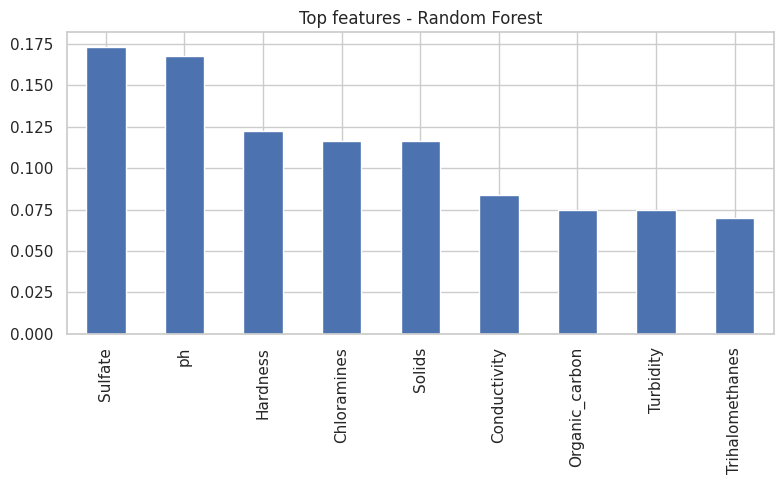

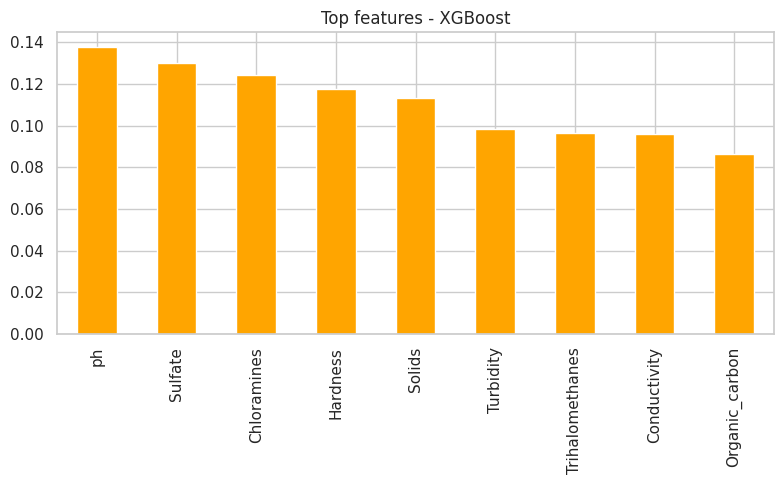

In [22]:
importances_rf = best_rf.feature_importances_
feat_names = X.columns
rf_imp = pd.Series(importances_rf, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(8,5))
rf_imp.head(10).plot(kind='bar')
plt.title('Top features - Random Forest')
plt.tight_layout()
plt.show()

importances_xgb = best_xgb.feature_importances_
xgb_imp = pd.Series(importances_xgb, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(8,5))
xgb_imp.head(10).plot(kind='bar', color='orange')
plt.title('Top features - XGBoost')
plt.tight_layout()
plt.show()

## Final Model Selection & Save
Choose best model based on F1/ROC-AUC and save it using joblib.

In [23]:
# Compare tuned models and pick best
final_results = {
    'Model': ['LogReg', 'RF-base', 'XGB-base', 'RF-tuned', 'XGB-tuned'],
    'F1': [
        f1_score(y_test, y_pred_base),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_best_rf),
        f1_score(y_test, y_pred_best_xgb)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob_base),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_xgb),
        roc_auc_score(y_test, y_prob_best_rf),
        roc_auc_score(y_test, y_prob_best_xgb)
    ]
}
final_df = pd.DataFrame(final_results)
final_df

# Pick best by F1 (or a combined metric)
best_idx = final_df['F1'].idxmax()
best_model_name = final_df.loc[best_idx, 'Model']
print('Best model according to F1:', best_model_name)

# Map name to estimator
model_map = {
    'LogReg': baseline,
    'RF-base': rf,
    'XGB-base': xgb,
    'RF-tuned': best_rf,
    'XGB-tuned': best_xgb
}
best_model = model_map[best_model_name]

# Save best model and preprocessing objects
joblib.dump(best_model, 'water_potability_best_model.pkl')
joblib.dump(imputer, 'imputer.pkl')
joblib.dump(scaler, 'scaler.pkl')

print('Saved best model and preprocessing objects: water_potability_best_model.pkl, imputer.pkl, scaler.pkl')

Best model according to F1: RF-tuned
Saved best model and preprocessing objects: water_potability_best_model.pkl, imputer.pkl, scaler.pkl


## ✅ Conclusion

- Baseline model established using Logistic Regression.
- Advanced models (Random Forest & XGBoost) implemented and tuned.
- Final model selected based on F1 and ROC-AUC and saved for deployment.

### 📌 Notes for submission
- Notebook contains Week 1 recap, Week 2 models, and Week 3 tuning & finalization.
- Include this notebook, the saved model file, and the short PPT/report in the final submission folder.